In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import scipy.ndimage
from PIL import Image
import matplotlib.pyplot as plt
import math

import preprocess as p

#### Combine FER and Mux datasets

In [2]:
combined = p.combine_mux_fer()
combined["emotion"].value_counts()

3    14685
6    13066
4     6345
0     5205
2     5142
5     4370
Name: emotion, dtype: int64

#### Visualization of the augmented images
#### Mux

0.8313725490196079
0.07058823529411765
torch.Size([3, 48, 48])
0.8303358547949187
0.0
torch.Size([3, 48, 48])
0.8313725490196079
0.07058823529411765
torch.Size([3, 48, 48])


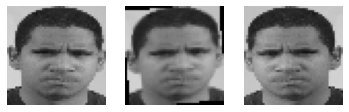

In [4]:
ex_img = p.read_and_resize_mux_image('../datasets/MuxspaceDataset/images/' + str(combined.iloc[0]["image"]))
augmented_images = p.augment(ex_img, normalize_tensors=False)
p.plot_augmented_images(augmented_images)

#### FER

0.9450980392156862
0.0
torch.Size([3, 48, 48])
0.929883406959895
0.0
torch.Size([3, 48, 48])
0.9450980392156862
0.0
torch.Size([3, 48, 48])


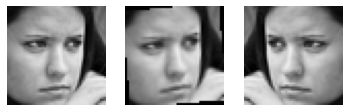

In [5]:
ex_img = p.read_and_resize_fer_image(combined.iloc[-1][" pixels"])
augmented_images = p.augment(ex_img, normalize_tensors=False)
p.plot_augmented_images(augmented_images)

#### Split Combined Data to Training, Validation, Test

In [5]:
training, validation, test = p.split_dataset(combined)

In [6]:
# Check
print("Training: ")
print(training.shape)
# print(training["emotion"].value_counts())
print("Validation: ")
print(validation.shape)
# print(validation["emotion"].value_counts())
print("Testing: ")
print(test.shape)
# print(test["emotion"].value_counts())

Training: 
(34167, 3)
3    10279
6     9146
4     4441
0     3643
2     3599
5     3059
Name: emotion, dtype: int64
Validation: 
(7322, 3)
3    2203
6    1960
4     952
0     781
2     771
5     655
Name: emotion, dtype: int64
Testing: 
(7324, 3)
3    2203
6    1960
4     952
0     781
2     772
5     656
Name: emotion, dtype: int64


### Augumentation
1. Save all the original images to make sure we don't undersample the original dataset
2. Save the augmented images (rotated left, flipped) for classes with around 3k-4k images, this multiplies it by 3
3. Save the augmented images (rotated right) for all classes (at this point, all classes have around 9k - 10k images, we try to get it to 12k images exactly for each class with this last augmentation)

#### Save original data

In [7]:
folder_name = 'cutoff12000'

# Current count 
count = [0, 0, 0, 0, 0, 0, 0]
p.save_dataset_as_tensors(training, folder_name, 'train', 12000, count)
print(count)

Finished saving to ../ProcessedData/cutoff12000_normalized/train/


#### Save augmented data until cutoff
- Augmentation includes: rotated left by 5 degrees, flipped across vertical axis
- After this, all classes will have between 9k - 12k iamges

In [ ]:
p.augment_and_save(training, folder_name, 'train', 12000, count)
print(count)

#### Augument more for classes that don't have enough images
- Rotates images to the right by 5 degrees
- This is done at the end to make all classes have equal number of images (9k-10k per class to exactly 12k per class)

In [ ]:
p.augment_and_rotate(training, folder_name, 'train', 12000, count)
print(count)

#### Save the validation and test sets

In [9]:
count = [0, 0, 0, 0, 0, 0, 0]
p.save_dataset_as_tensors(validation, folder_name, 'validate', 3000, count)   # Will not exceed 3000, don't need to cutoff validation
count = [0, 0, 0, 0, 0, 0, 0]
p.save_dataset_as_tensors(test, folder_name, 'test', 3000, count) # Will not exceed 3000, don't need to cutoff test set

Finished saving to ../ProcessedData/cutoff12000_normalized/validate/
Finished saving to ../ProcessedData/cutoff12000_normalized/test/


#### Save FER dataset for testing purposes
- Save unaugmented FER dataset split into training, validation, and testing sets
- Only the testing set is going to be used

In [7]:
'''Loading FER dataset'''
fer = pd.read_csv("../datasets/FER_dataset/icml_face_data.csv", usecols=["emotion", " pixels"])
combined = combined[combined.emotion != 1] # Remove Disgust
fer["emotion"].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [14]:
# Split
fer_training, fer_validation, fer_test = p.split_dataset(fer)
# Check
print("FER Training: ")
print(fer_training.shape)
# print(fer_training["emotion"].value_counts())
print("FER Validation: ")
print(fer_validation.shape)
# print(fer_validation["emotion"].value_counts())
print("FER Testing: ")
print(fer_test.shape)
print(fer_test["emotion"].value_counts())

FER Training: 
(25117, 2)
FER Validation: 
(5383, 2)
FER Testing: 
(5387, 2)
3    1349
6     930
4     912
2     769
0     743
5     601
1      83
Name: emotion, dtype: int64


In [13]:
fer_folder = 'fer'

# count = [0, 0, 0, 0, 0, 0, 0]
# p.save_dataset_as_tensors(fer_train, fer_folder, 'validate', 10000, count)       # Will not exceed 10000
# count = [0, 0, 0, 0, 0, 0, 0]
# p.save_dataset_as_tensors(fer_validation, fer_folder, 'test', 10000, count)      # Will not exceed 10000
count = [0, 0, 0, 0, 0, 0, 0]
p.save_dataset_as_tensors(fer_test, fer_folder, 'test', 10000, count)              # Will not exceed 10000

Finished saving to ../ProcessedData/fer/test/
